# Natural Language Processing (NLP) with Python

## NPL for Predicting Spam or Ham Messages

### Import Libraries

In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# for Download Require Package
#nltk.download_shell()

### Get The Data

In [4]:
messages = [line.rstrip() for line in open('Datasets/SMS_Spam_Collection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
for mess_num, message in enumerate(messages[:7]):
    print(f'{mess_num}:{message}',end='\n'*2)

0:ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1:ham	Ok lar... Joking wif u oni...

2:spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3:ham	U dun say so early hor... U c already then say...

4:ham	Nah I don't think he goes to usf, he lives around here though

5:spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6:ham	Even my brother is not like to speak with me. They treat me like aids patent.



In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### Converting the text file into pandas DataFrame

In [8]:
messages = pd.read_csv('Datasets/SMS_Spam_Collection/SMSSpamCollection',sep='\t', names=['Label', 'Message'])

In [9]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Exploring

In [10]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['Length'] = messages['Message'].apply(len)

In [13]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

### Data Visualization

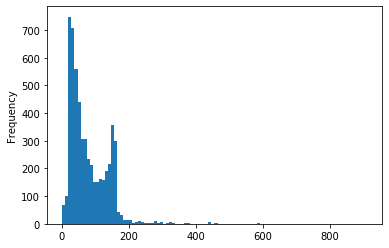

In [15]:
messages['Length'].plot.hist(bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C833AFE550>,
      dtype=object)

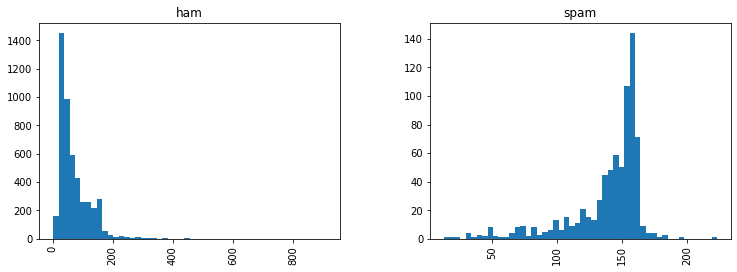

In [16]:
messages.hist(column='Length', by='Label', bins=50, figsize=(12,4))

### Text Preprocessing

#### Removing Punctuation from a string

In [17]:
import string

In [18]:
sample_message = "This is Sample Message! Notice: it has punctuation."

In [20]:
str_punc = string.punctuation
str_punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
# checking for punctuation that they are not present in sample_message
no_punc = [char for char in sample_message if char not in str_punc]
print(no_punc)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'S', 'a', 'm', 'p', 'l', 'e', ' ', 'M', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


In [23]:
# converting the list into string
no_punc = ''.join(no_punc)
no_punc

'This is Sample Message Notice it has punctuation'

In [24]:
# Extracting the words by using split
extra_punc = no_punc.split()
extra_punc

['This', 'is', 'Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

#### Extracting Important words form sample extracted message

In [25]:
# importing stopwords
from nltk.corpus import stopwords

In [27]:
clean_message = [word for word in extra_punc if word.lower() not in stopwords.words('english')]

In [28]:
clean_message

['Sample', 'Message', 'Notice', 'punctuation']

#### Creating function for text-preprocessing

In [38]:
def text_processing(mess):
    '''
    1.Removing the punctuation 
    2.Removing the stopwords
    2.Returning the clean text words
    '''
    # 1.Removing the punctuation
    str_punc = string.punctuation
    no_punc = [char for char in mess if char not in str_punc]
    # Converting list into string
    no_punc = ''.join(no_punc)
    # Extrating as a word into list
    extra_punc = no_punc.split()
    # Removing the stopwords
    clean_mess = [word for word in extra_punc if word.lower() not in stopwords.words('english')]
    # Returning the clean words 
    return clean_mess

In [39]:
print(text_processing(sample_message))

['Sample', 'Message', 'Notice', 'punctuation']


#### Now applying the text_processing to the messages

In [34]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
messages['Message'].head(5).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

### Vectorization

#### CountVectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
backword_transformer = CountVectorizer(analyzer=text_processing).fit(messages['Message'])

In [43]:
print(f'Total Number of vocabulary words: {len(backword_transformer.vocabulary_)}')

Total Number of vocabulary words: 11425


In [44]:
mess10 = messages['Message'][9]
mess10

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [47]:
backword10 = backword_transformer.transform([mess10])
print(backword10)

  (0, 58)	1
  (0, 315)	1
  (0, 1417)	1
  (0, 1492)	1
  (0, 1865)	1
  (0, 1941)	1
  (0, 2852)	1
  (0, 3321)	1
  (0, 4068)	1
  (0, 4128)	2
  (0, 5304)	1
  (0, 5594)	1
  (0, 6328)	1
  (0, 7716)	1
  (0, 8216)	1
  (0, 8217)	1
  (0, 8251)	1


In [48]:
print(backword10.shape)

(1, 11425)


In [49]:
backword_transformer.get_feature_names()[8251]

'months'

In [50]:
backword_transformer.get_feature_names()[3321]

'R'

In [52]:
messages_backword = backword_transformer.transform(messages['Message'])

In [53]:
print(f'The Shape of Sparse Matrix: {messages_backword.shape}')

The Shape of Sparse Matrix: (5572, 11425)


In [54]:
print(f'Non zero occurrences: {messages_backword.nnz}')

Non zero occurrences: 50548


In [56]:
sparsity = (100.0 * messages_backword.nnz / (messages_backword.shape[0] * messages_backword.shape[1]))
print(f'Sparsity: {sparsity}')

Sparsity: 0.07940295412668218


#### TfidfTransformer
TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

In [58]:
tfidf_transformer = TfidfTransformer()

In [59]:
tfidf_transformer.fit(messages_backword)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [60]:
tfidf10 = tfidf_transformer.transform(backword10)
print(tfidf10)

  (0, 8251)	0.24241519917488308
  (0, 8217)	0.24860464952517933
  (0, 8216)	0.16878018627985983
  (0, 7716)	0.2113089707557115
  (0, 6328)	0.2521814272360164
  (0, 5594)	0.22507369610987876
  (0, 5304)	0.22183810709807938
  (0, 4128)	0.48483039834976616
  (0, 4068)	0.13464474024308146
  (0, 3321)	0.20511952040541523
  (0, 2852)	0.21019582218498448
  (0, 1941)	0.19606801326497764
  (0, 1865)	0.17217781851006528
  (0, 1492)	0.2561799245290503
  (0, 1417)	0.15512340375049818
  (0, 315)	0.24860464952517933
  (0, 58)	0.2894771060054842


In [61]:
messages_tfidf = tfidf_transformer.transform(messages_backword)

### Training a model

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
spam_detect_model = MultinomialNB()

In [65]:
spam_detect_model.fit(messages_tfidf,messages['Label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
spam_detect_model.predict(tfidf10)[0]

'spam'

In [67]:
messages['Label'][9]

'spam'

#### Model Evaluation

In [69]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['Message'], messages['Label'], test_size=0.2)

### Creating a Data Pipeline

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
pipeline = Pipeline([
    ('backword', CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [75]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('backword', CountVectorizer(analyzer=<function text_processing at 0x000001C83AFC9C80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pre...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [76]:
predictions = pipeline.predict(msg_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print("Classification Report: ", classification_report(label_test, predictions))

Classification Report:                precision    recall  f1-score   support

         ham       0.96      1.00      0.98       983
        spam       1.00      0.70      0.83       132

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.97      0.97      0.96      1115



In [79]:
accuracy = pipeline.score(label_test,predictions)*100
print("Accuracy = ", accuracy, " %")

Accuracy =  91.65919282511211  %
